In [1]:
from fastai.data.all import *
from fastai.vision.all import *

In [2]:
import torch
import torchvision.models as models
from torch.profiler import profile, record_function, ProfilerActivity

In [3]:
import numpy as np

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
device

device(type='cpu')

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)

In [7]:
path.ls()

(#3) [Path('/Users/stephenzhou/.fastai/data/mnist_sample/valid'),Path('/Users/stephenzhou/.fastai/data/mnist_sample/labels.csv'),Path('/Users/stephenzhou/.fastai/data/mnist_sample/train')]

In [8]:
(path/'train').ls()

(#2) [Path('/Users/stephenzhou/.fastai/data/mnist_sample/train/7'),Path('/Users/stephenzhou/.fastai/data/mnist_sample/train/3')]

In [9]:
threes = sorted((path/'train/3').ls())

In [10]:
sevens = (path/'train/7').ls().sorted()

In [11]:
im3_path = threes[1]

In [12]:
im3 = Image.open(im3_path)

In [13]:
im3

In [14]:
array(im3).shape

(28, 28)

In [15]:
im3_t = tensor(im3)

In [16]:
df = pd.DataFrame(im3_t[4:15, 4:22])

In [17]:
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [18]:
tensors3 = [tensor(Image.open(o)) for o in threes]

In [19]:
tensors7 = [tensor(Image.open(o)) for o in sevens]

In [20]:
len(tensors3)

6131

In [21]:
len(tensors7)

6265

<Axes: >

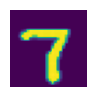

In [22]:
show_image(tensors7[0])

In [23]:
stacked_sevens = torch.stack(tensors7).float()/255

In [24]:
stacked_threes = torch.stack(tensors3).float()/255

In [25]:
stacked_threes.shape

torch.Size([6131, 28, 28])

In [26]:
mean3 = stacked_threes.mean(0)

<Axes: >

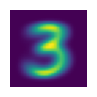

In [27]:
show_image(mean3)

In [28]:
mean7 = stacked_sevens.mean(0)

<Axes: >

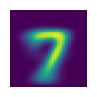

In [29]:
show_image(mean7)

In [30]:
def f(t, params):
    return params[0]*(t**2) + params[1]*t + params[2]

In [31]:
# xt = tensor(3.).requires_grad_()

In [32]:
# yt = f(xt)

In [33]:
# yt

In [34]:
# yt.backward()

In [35]:
# xt.grad

In [36]:
def mse(preds, targets):
    return torch.mean((preds - targets)**2)

In [37]:
params = torch.randn(3).requires_grad_()

In [38]:
params

tensor([-0.9283, -2.6681, -1.1454], requires_grad=True)

In [39]:
time = torch.arange(20).float()

In [40]:
speed = torch.randn(20)*3 + 0.75 * (time - 9.5)**2 + 1

In [41]:
pred = f(time, params)

In [42]:
pred

tensor([  -1.1454,   -4.7418,  -10.1947,  -17.5042,  -26.6702,  -37.6928,
         -50.5719,  -65.3075,  -81.8997, -100.3484, -120.6536, -142.8154,
        -166.8337, -192.7085, -220.4399, -250.0279, -281.4723, -314.7733,
        -349.9308, -386.9449], grad_fn=<AddBackward0>)

In [43]:
speed

tensor([73.4718, 55.2151, 48.1415, 32.2048, 27.7304, 11.5703, 11.2025,  5.6044,
         3.2588,  2.6303,  3.5282,  5.5357,  3.5992, 12.3235, 12.8517, 21.1019,
        33.7354, 45.6635, 56.8128, 63.3296])

In [44]:
def show_preds(preds, ax = None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

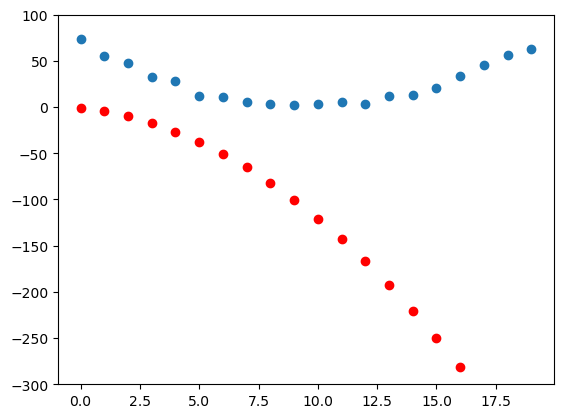

In [45]:
show_preds(pred)

In [46]:
loss = mse(pred, speed)

In [47]:
loss.backward()

In [48]:
params.grad

tensor([-69781.6875,  -4522.9453,   -335.2188])

In [49]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= 1e-5 * params.grad
    params.grad = None
    if prn:
        print(loss.item())
    return preds